Dhea Gita (H071201030)

# <font color = '#008080'>Algoritma Clustering</font>

### <font color = '#808080'>Informasi Data</font>
Kumpulan data ini mencakup 721 Pokemon, termasuk `number`, `name`, `first and second type`, dan basic stats: `HP`, `Attack`, `Defense`, `Special Attack`, `Special Defense`, dan `Speed`. Ini adalah atribut mentah yang digunakan untuk menghitung berapa banyak *damage* sebuah serangan dalam game. Kumpulan data ini terntang game Pokemon (BUKAN kartu pokemon atau Pokemon Go).


### <font color = '#808080'>Informasi Atribut</font>
* **ID** untuk setiap pokemon
* **Type 1 -** setiap pokemon memiliki tipe, ini menentukan kelemahan/ketahanan terhadap serangan
* **Type 2 -** beberapa pokemon adalah tipe ganda dan memiliki dua
* **Total -** jumlah semua stats yang muncul, seberapa kuat pokemon
* **HP -** *Hit Points*, atau kesehatan, menentukan seberapa banyak *damage* yang dapat ditahan pokemon sebelum pingsan
* **Attack -** serangan normal (misal Scratch, Punch)
* **Defense -** pertahanan *base damage* terhadap serangan normal
* **SP Atk -** *spesial attack*, serangan khusus (misal fire blast, bubble beam)
* **SP Def -** pertahanan *base damage* terhadap serangan khusus
* **Speed -** kecepatan serangan pokemon


### <font color = '#808080'>Objektif</font>
* Part 1: Read Data
* Part 2: Split Dataset
* Part 3: Machine Learning & Pengujian Metode
* Part 4: Kesimpulan


### <font color = '#808080'>Sumber Data</font>
https://www.kaggle.com/datasets/abcsds/pokemon


### <font color = '#808080'>Yang Diperlukan</font>
* Python library: `pandas`, `numpy`, `matplotlib`, `scikit-learn`
* Datafiles: `Pokemon.csv`

## Part 1: Read Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Data/pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [4]:
df['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


## Part 2: Tahapan Analisis

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [8]:
# Memilih fitur yang akan digunakan untuk clustering
X = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

# Melakukan normalisasi data
X_norm = (X - X.mean()) / X.std()

# Melakukan clustering untuk nilai k antara 2 sampai 10
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_norm)
    labels = kmeans.predict(X_norm)
    score = silhouette_score(X_norm, labels)
    print("Skor untuk k = {}: {}".format(i, score))

Skor untuk k = 2: 0.2885765037103704
Skor untuk k = 3: 0.2554008927933584
Skor untuk k = 4: 0.21703922508755233
Skor untuk k = 5: 0.22574713980787464
Skor untuk k = 6: 0.2114132325405279
Skor untuk k = 7: 0.22551423920551877
Skor untuk k = 8: 0.1621701312315144
Skor untuk k = 9: 0.1570351184999333
Skor untuk k = 10: 0.16043589314820866


Dari data di atas, nilai k yang baik adalah 2 karena memiliki skor tertinggi di antara yang lainnya.

## Part 3: Machine Learning

In [13]:
# Menentukan jumlah cluster
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)

# Melakukan clustering dan memperoleh label cluster
y_kmeans = kmeans.fit_predict(X_norm)

# Menambahkan kolom cluster pada dataset Pokemon
df['cluster'] = y_kmeans
df[['Name', 'cluster']].head()

,Name,cluster
0,Bulbasaur,1
1,Ivysaur,1
2,Venusaur,0
3,VenusaurMega Venusaur,0
4,Charmander,1


In [14]:
y_kmeans = kmeans.predict(X_norm)

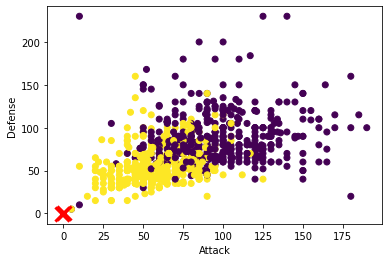

In [15]:
# membuat scatter plot
plt.scatter(df['Attack'], df['Defense'], c=df['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker='x', s=200, linewidths=3, color='r')

# add labels to the axes
plt.xlabel('Attack')
plt.ylabel('Defense')

# show the plot
plt.show()

## Part 4: Kesimpulan

Pengujian skor algoritma clustering dilakukan untuk menentukan nilai k yang optimal. Pada kasus ini, nilai k yang optimal adalah 2 karena memiliki skor 0.28, yang jika dibandingkan dengan nilai k lainnya, nilai k=2 memiliki skor tertinggi.